In [61]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
pd.set_option('display.max_rows', 137)
pd.set_option('display.max_columns', 80)


# Random Forest Regressor Simulations

In [7]:
df = pd.read_csv('simulation.csv', index_col=0)

In [8]:
df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,test_prediction,cagr
1794613,5000.0,0,17.76,180.17,0,10,4,63180.0,2,29,7.86,3.0,674.0,1.0,9.0,0.0,4368.0,68.2,27.0,0.0,0.0,0.0,0,19.1,0.051602,0.083062
1217005,14350.0,0,15.61,501.75,0,0,0,36000.0,2,15,17.40,0.0,714.0,1.0,11.0,0.0,12231.0,52.5,28.0,0.0,0.0,0.0,0,22.5,0.017364,0.078235
1302940,20400.0,1,24.08,587.82,11,5,4,60000.0,2,0,14.52,0.0,709.0,1.0,5.0,0.0,3332.0,18.7,13.0,0.0,0.0,0.0,0,5.2,-0.026140,0.100902
1129952,5000.0,0,15.99,175.77,1,1,4,34000.0,1,4,6.92,0.0,734.0,1.0,5.0,0.0,6350.0,48.8,6.0,0.0,0.0,0.0,0,7.2,0.028648,0.062390
1874132,3375.0,0,21.00,127.16,6,7,4,18000.0,2,26,21.40,0.0,679.0,0.0,10.0,0.0,7271.0,72.7,12.0,0.0,0.0,0.0,0,7.4,0.040139,0.105555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933641,30000.0,0,19.22,1103.03,4,10,4,175000.0,9,32,11.62,0.0,684.0,1.0,11.0,0.0,8286.0,19.5,32.0,0.0,0.0,0.0,0,20.7,0.044578,0.072284
1772678,16000.0,1,19.52,419.65,3,6,4,91000.0,2,4,23.74,0.0,674.0,0.0,14.0,0.0,4623.0,57.1,29.0,0.0,0.0,1.0,0,13.3,-0.003293,0.054017
1882531,24250.0,1,17.77,612.77,0,0,0,54000.0,4,32,6.89,2.0,694.0,2.0,11.0,0.0,6901.0,22.9,33.0,0.0,0.0,0.0,0,42.6,0.007919,0.006717
1332061,12550.0,1,23.40,356.69,9,10,0,68000.0,1,14,29.92,0.0,679.0,3.0,14.0,0.0,9105.0,83.5,62.0,0.0,0.0,0.0,0,11.9,-0.007781,-0.137995


In [4]:
#df = df[df['issue_d']<'2015-01-01']

In [6]:
df['loan_amnt'].describe()

count    122772.000000
mean      16041.303595
std        9315.222944
min         500.000000
25%        8725.000000
50%       15000.000000
75%       22400.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [24]:
#unfiltered sample of 100 randomly selected loans
unfilter_sample = df.sample(n=100)

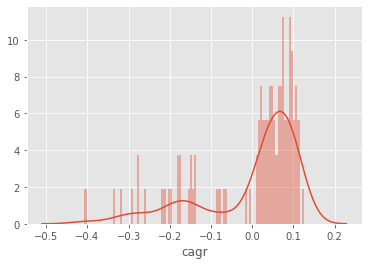

In [25]:
#distribution of unfiltered loans

import seaborn as sns 
sns.distplot(unfilter_sample['cagr'], bins = 100)


## Equal Weighted Loans

In [130]:
#function to simulate avg return on a portfolio of 100 loans given data and # of simulations

count=0
results = []

def simulate(dataframe, num_sims):
    count=0
    results = []
    
    while count <num_sims:
        sample = dataframe.sample(100)
        results.append(sample['cagr'].mean())
        count += 1
        
    return results




#### Finding the optimal CAGR Threshold

In [239]:
#creating a list of CAGR cuttoffs to compare
cutoffs = [0,.015,.03,.045]

#creating a dictionary that contains each DF based on the unique CAGR cutoff
rf_reg_dfs = {}
for c in cutoffs:
    rf_reg_dfs[c] = df[df['test_prediction']>c]
    


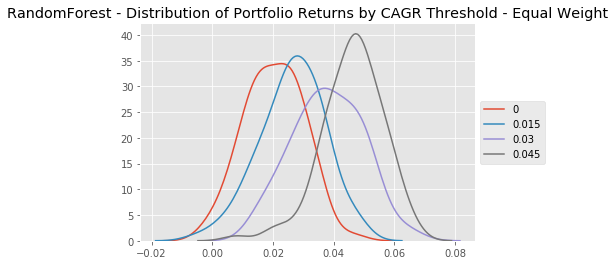

In [135]:
#Simulating 100 porfolios of 100 loans using different CAGR thresholds and 
#comparing performance (EQUAL WEIGHTED LOANS)


for i in rf_reg_dfs:
    temp = rf_reg_dfs[i]
    
    filt = simulate(temp,100)
    
    sns.distplot(filt, bins = 50, hist=False, label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('RandomForest - Distribution of Portfolio Returns by CAGR Threshold - Equal Weight')

#### Portfolio Performance of Our Pool of Loans vs Randomly Selected Pool of Loans

Text(0.5, 1.0, 'RandomForest Portfolio Returns - Our Pool vs Random - Equal Weight')

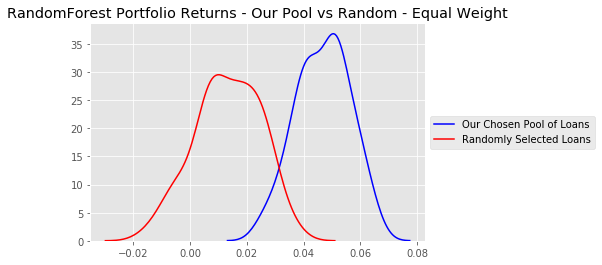

In [222]:
top_forest_df = rf_reg_dfs[.045]
forestreg_filter_results = simulate(top_forest_df, 100)
forestreg_unfilter_results = simulate(df, 100)

sns.distplot(forestreg_filter_results, bins = 50, hist=False, color='blue', label = 'Our Chosen Pool of Loans')
sns.distplot(forestreg_unfilter_results, bins = 50, hist=False, color='red', label = 'Randomly Selected Loans')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('RandomForest Portfolio Returns - Our Pool vs Random - Equal Weight')

## Weighted Avg Loans

In [54]:
#function to simulate WEIGHTED avg return on a portfolio of 100 loans given data and # of simulations

def simulate_weighted(dataframe, num_sims):
    count=0
    results = []
    
    while count <num_sims:
        sample = dataframe.sample(100)
        sample['weight'] = sample['loan_amnt']/sample['loan_amnt'].sum()
        sample['weighted_cagr'] = sample['cagr']*sample['weight']
        results.append(sample['weighted_cagr'].sum())
        count += 1
        
    return results

#### Finding the optimal CAGR Threshold

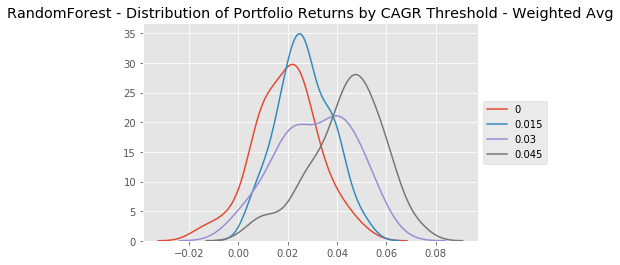

In [140]:
for i in rf_reg_dfs:
    temp = rf_reg_dfs[i]
    
    filt = simulate_weighted(temp,100)
    
    sns.distplot(filt, bins = 50, hist=False, label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('RandomForest - Distribution of Portfolio Returns by CAGR Threshold - Weighted Avg')

#### Portfolio Performance of Our Pool of Loans vs Randomly Selected Pool of Loans

Text(0.5, 1.0, 'RandomForest Portfolio Returns - Our Pool vs Random - Weighted Avg Loans')

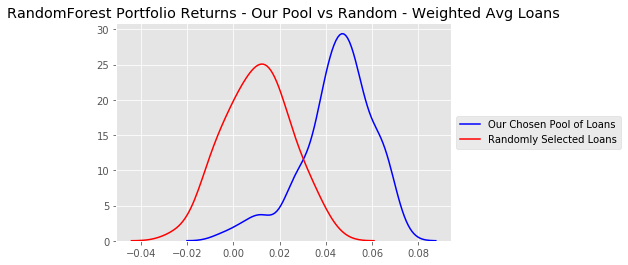

In [143]:
top_forest_df = rf_reg_dfs[.045]
forestreg_filter_results_weighted = simulate_weighted(top_forest_df, 100)
forestreg_unfilter_results_weighted = simulate_weighted(df, 100)

sns.distplot(forestreg_filter_results_weighted, bins = 50, hist=False, color='blue', label = 'Our Chosen Pool of Loans')
sns.distplot(forestreg_unfilter_results_weighted, bins = 50, hist=False, color='red', label = 'Randomly Selected Loans')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('RandomForest Portfolio Returns - Our Pool vs Random - Weighted Avg Loans')

# XGBoost Regressor Simulation

In [77]:
data = pd.read_csv('xgboost_reg_cagr.csv', index_col=0)


In [79]:
data

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prediction,cagr
1290584,27325.0,1,20.49,731.42,6,5,0,90000.0,4,9,19.97,0.0,709.0,3.0,16.0,0.0,12040.0,41.8,23.0,0.0,0.0,0.0,0,10.2,0.012266,-0.389650
1841344,22250.0,1,21.49,608.09,7,10,3,50000.0,2,32,21.86,0.0,709.0,0.0,15.0,0.0,32318.0,61.7,25.0,0.0,0.0,0.0,0,24.3,0.006193,0.032047
1775149,21000.0,1,24.08,605.11,11,10,0,61000.0,2,21,18.00,1.0,689.0,3.0,15.0,1.0,6613.0,23.5,46.0,0.0,0.0,0.0,0,23.4,0.004706,0.059950
1634124,12750.0,1,14.46,299.72,1,6,3,35000.0,4,4,12.51,0.0,689.0,0.0,11.0,0.0,5187.0,64.8,24.0,0.0,0.0,0.0,0,31.3,0.006544,0.071202
1646123,23500.0,0,14.96,814.16,1,10,3,124000.0,0,5,8.25,1.0,709.0,0.0,4.0,0.0,255.0,0.8,10.0,0.0,0.0,0.0,0,14.3,0.021064,0.076420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209252,22825.0,1,22.15,632.35,9,3,4,63600.0,2,19,25.49,2.0,669.0,0.0,25.0,0.0,9256.0,62.1,70.0,0.0,0.0,0.0,0,11.2,0.004234,0.086812
1908757,18000.0,0,19.05,660.27,3,7,4,51925.0,2,41,18.49,0.0,669.0,0.0,13.0,0.0,18223.0,86.8,28.0,0.0,0.0,0.0,0,11.2,0.014204,0.096926
1176969,35000.0,1,22.15,969.65,9,3,4,100000.0,2,10,20.07,0.0,684.0,0.0,29.0,0.0,19067.0,62.7,36.0,0.0,0.0,0.0,0,22.8,0.013952,-0.123932
1163427,35000.0,0,17.57,1257.80,3,10,0,191000.0,1,41,18.58,0.0,714.0,0.0,11.0,0.0,33816.0,86.0,22.0,0.0,0.0,0.0,0,17.5,0.024432,-0.202465


(-0.5, 0.2)

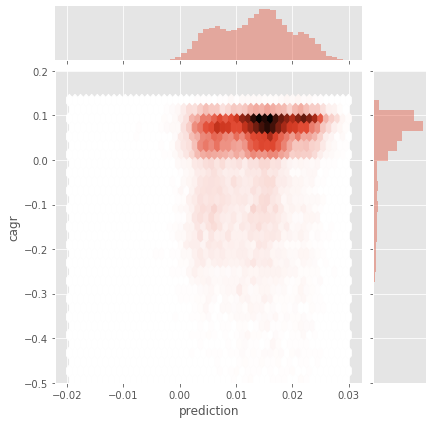

In [97]:
sns.jointplot(x='prediction', y='cagr',data=data, kind='hex')
#plt.ylim(-.5, .2)

In [106]:
#creating a list of CAGR cuttoffs to compare
cutoffs = [0,.01,.015,.02,.025]

#creating a dictionary that contains each DF based on the unique CAGR cutoff
boost_reg_dfs = {}
for c in cutoffs:
    boost_reg_dfs[c] = data[data['prediction']>c]
 

## Equal Weighted Loans

#### Finding the optimal CAGR Threshold

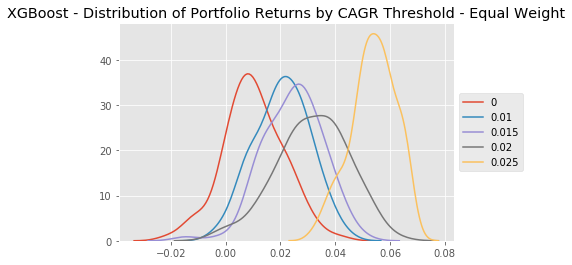

In [119]:
#Simulating 100 porfolios of 100 loans using different CAGR thresholds and 
#comparing performance (EQUAL WEIGHTED LOANS)


for i in boost_reg_dfs:
    temp = boost_reg_dfs[i]
    
    filt = simulate(temp,100)
    
    sns.distplot(filt, bins = 50, hist=False, label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('XGBoost - Distribution of Portfolio Returns by CAGR Threshold - Equal Weight')
    

#### Portfolio Performance of Our Pool of Loans vs Randomly Selected Pool of Loans

Text(0.5, 1.0, 'XGBoost Portfolio Returns - Our Pool vs Random - Equal Weight')

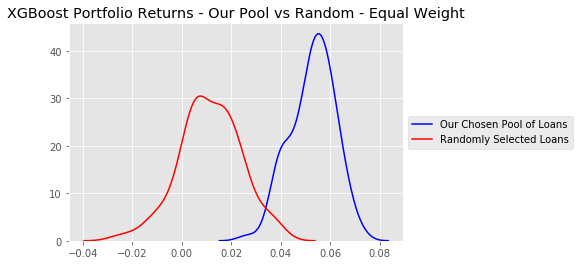

In [223]:
top_boost_reg_df = boost_reg_dfs[.025]
boostreg_filter_results = simulate(top_boost_reg_df, 100)
boostreg_unfilter_results = simulate(data, 100)

sns.distplot(boostreg_filter_results, bins = 50, hist=False, color='blue', label = 'Our Chosen Pool of Loans')
sns.distplot(boostreg_unfilter_results, bins = 50, hist=False, color='red', label = 'Randomly Selected Loans')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('XGBoost Portfolio Returns - Our Pool vs Random - Equal Weight')


## Weighted Avg Loans

#### Finding the optimal CAGR Threshold

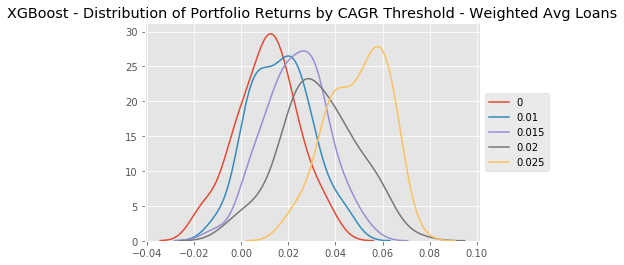

In [118]:
for i in boost_reg_dfs:
    temp = boost_reg_dfs[i]
    
    filt = simulate_weighted(temp,100)
    
    sns.distplot(filt, bins = 50, hist=False, label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('XGBoost - Distribution of Portfolio Returns by CAGR Threshold - Weighted Avg Loans')

#### Performance of Our Pool of Loans vs Randomly Selected Pool of Loans

Text(0.5, 1.0, 'XGBoost Portfolio Returns - Our Pool vs Random - Weighted Avg Loans')

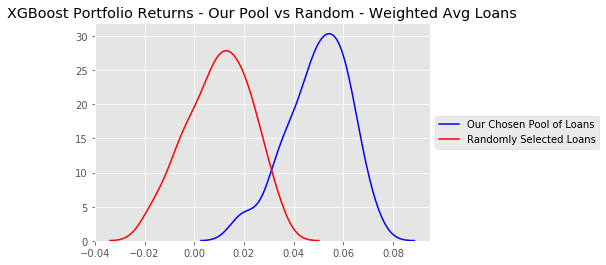

In [211]:
top_boost_reg_df = boost_reg_dfs[.025]
boostreg_filter_results_weighted = simulate_weighted(top_boost_reg_df, 100)
boostreg_unfilter_results_weighted = simulate_weighted(data, 100)

sns.distplot(boostreg_filter_results_weighted, bins = 50, hist=False, color='blue', label = 'Our Chosen Pool of Loans')
sns.distplot(boostreg_unfilter_results_weighted, bins = 50, hist=False, color='red', label = 'Randomly Selected Loans')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('XGBoost Portfolio Returns - Our Pool vs Random - Weighted Avg Loans')

# XGBoost Classifier Simulation

In [181]:
d = pd.read_csv('xgb_class_test.csv', index_col=0)
cagrs = pd.read_csv('model_df_cagr.csv', index_col=0)

In [184]:
ind = list(d.index)

[1284395,
 1921971,
 1638457,
 1273169,
 1631606,
 1202287,
 1315418,
 1892057,
 1306892,
 1856305,
 1632193,
 1149460,
 1276640,
 1212335,
 1854044,
 1313741,
 1917533,
 1246364,
 1896283,
 1770731,
 1132357,
 1135708,
 1129137,
 1868892,
 1801523,
 1263625,
 1862003,
 1260736,
 1289191,
 1280164,
 1183009,
 1239222,
 1228590,
 1126841,
 1770007,
 1334923,
 1347352,
 1283102,
 1281871,
 1939145,
 1351264,
 1205649,
 1166046,
 1188659,
 1133013,
 1282140,
 1243322,
 1918925,
 1186541,
 1632240,
 1804666,
 1873580,
 1617350,
 1866581,
 1168925,
 1220506,
 1171364,
 1278839,
 1262170,
 1206846,
 1860933,
 1184495,
 1163289,
 1342871,
 1326751,
 1880453,
 1850914,
 1890718,
 1158407,
 1173596,
 1324387,
 1153540,
 1182030,
 1814982,
 1825410,
 1815243,
 1149876,
 1771906,
 1639128,
 1852696,
 1223333,
 1756911,
 1286289,
 1837259,
 1276813,
 1767110,
 1937534,
 1234624,
 1799936,
 1937225,
 1207092,
 1342209,
 1895666,
 1318562,
 1304278,
 1266871,
 1161776,
 1222545,
 1218090,
 1617841,


In [197]:
cagrs= cagrs[cagrs.index.isin(ind)]
cagrs['cagr']

1117147    0.035686
1117159   -0.210866
1117169    0.042566
1117190    0.072698
1117193   -0.296445
             ...   
1939321   -0.154706
1939326    0.083087
1939333    0.085898
1939338    0.024139
1939340   -0.059729
Name: cagr, Length: 30289, dtype: float64

In [200]:
d = pd.concat([d, cagrs['cagr']], axis=1)

In [201]:
test = d[d['prob_paid_back']>.9]

In [202]:
test['loan_status'].value_counts()

1    539
0     65
Name: loan_status, dtype: int64

In [203]:
539/(539+64)

0.8938640132669984

In [204]:
d

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prob_paid_back,loan_status,cagr
1117147,24000.0,1,19.24,625.75,6,27597,2,3,55000.0,4,9,7.42,0.0,754.0,2.0,8.0,0.0,73.0,0.5,19.0,0.0,0.0,0.0,0,5.0,0.678442,1,0.035686
1117159,22200.0,1,17.14,553.40,3,10356,10,4,74500.0,2,18,8.05,0.0,699.0,0.0,7.0,0.0,7014.0,47.4,14.0,0.0,0.0,0.0,0,13.3,0.690020,0,-0.210866
1117169,3000.0,0,15.99,105.46,1,30963,10,3,35000.0,9,4,20.07,1.0,669.0,1.0,9.0,1.0,1497.0,14.8,23.0,0.0,0.0,0.0,0,41.7,0.853887,1,0.042566
1117190,2000.0,0,15.59,69.91,0,61188,10,0,70000.0,7,40,15.05,0.0,669.0,1.0,10.0,0.0,16201.0,79.4,17.0,0.0,0.0,0.0,0,14.2,0.840201,1,0.072698
1117193,15850.0,0,15.59,554.04,0,1636,9,4,44200.0,1,9,16.56,0.0,664.0,3.0,13.0,1.0,10701.0,51.0,36.0,0.0,0.0,0.0,0,10.3,0.676268,0,-0.296445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939321,30000.0,1,22.06,244.73,13,27300,10,4,88000.0,2,40,23.88,0.0,669.0,1.0,17.0,0.0,14523.0,57.9,36.0,0.0,0.0,0.0,0,17.3,0.545047,1,-0.154706
1939326,16400.0,0,16.29,578.93,0,34619,4,4,65000.0,11,9,17.34,0.0,709.0,1.0,8.0,0.0,14252.0,81.9,11.0,0.0,0.0,0.0,0,14.1,0.685393,1,0.083087
1939333,6600.0,1,17.58,166.10,3,47166,7,4,70000.0,1,31,6.03,0.0,694.0,1.0,8.0,0.0,10833.0,77.5,11.0,0.0,0.0,0.0,0,7.3,0.713862,1,0.085898
1939338,18000.0,1,22.35,500.73,14,50007,4,4,100000.0,2,31,15.31,0.0,669.0,3.0,11.0,0.0,12659.0,64.9,16.0,0.0,0.0,0.0,0,6.3,0.672148,1,0.024139


In [209]:
prob_thresholds = [.5,.6,.7,.8,.9]

boost_class_dfs={}

for p in prob_thresholds:
    temp = d.copy()
    
    boost_class_dfs[p]= temp[temp['prob_paid_back']>p] 
    
boost_class_dfs[.9]

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prob_paid_back,loan_status,cagr
1117949,35000.0,0,16.49,1238.98,2,45639,1,4,185000.0,1,4,13.76,0.0,729.0,0.0,8.0,0.0,32043.0,110.3,11.0,0.0,0.0,0.0,0,7.1,0.915642,1,0.012114
1119243,1125.0,0,17.14,40.19,3,59913,3,4,23000.0,9,2,26.98,0.0,719.0,1.0,7.0,0.0,5561.0,78.3,12.0,0.0,0.0,0.0,0,9.3,0.913772,1,0.009320
1120105,1300.0,0,15.99,45.70,1,54469,2,0,16000.0,6,4,13.95,0.0,674.0,4.0,20.0,1.0,3666.0,15.8,46.0,0.0,0.0,0.0,0,16.4,0.910113,1,0.002807
1120231,25000.0,1,6.00,533.96,4,37473,10,4,65000.0,2,32,31.46,0.0,719.0,0.0,13.0,0.0,15484.0,80.6,32.0,0.0,0.0,0.0,0,13.4,0.952273,1,0.074406
1122575,35000.0,1,18.54,899.09,5,17320,10,0,400000.0,2,4,15.18,0.0,724.0,1.0,14.0,0.0,193014.0,35.9,32.0,0.0,0.0,0.0,0,15.8,0.950988,1,0.023247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934230,2500.0,0,17.99,90.37,1,9610,7,4,15600.0,0,9,4.62,0.0,664.0,1.0,5.0,0.0,2898.0,25.4,8.0,0.0,0.0,0.0,0,4.7,0.905861,1,0.005007
1934556,18000.0,0,18.25,653.01,2,47313,4,4,104000.0,2,31,6.00,0.0,669.0,1.0,7.0,0.0,21323.0,89.2,19.0,0.0,0.0,0.0,0,8.3,0.910008,1,0.091877
1935801,1000.0,0,17.27,35.79,2,49850,4,4,25000.0,2,10,23.18,0.0,674.0,1.0,4.0,0.0,6653.0,88.7,13.0,0.0,0.0,0.0,0,4.0,0.912938,1,0.054294
1936847,30000.0,0,16.77,1066.16,1,2489,9,0,95000.0,2,35,11.91,0.0,704.0,0.0,6.0,0.0,28608.0,75.3,12.0,0.0,0.0,0.0,0,10.4,0.901663,1,0.082741


## Equal Weighted Loans

#### Finding the optimal Probability Thresholds

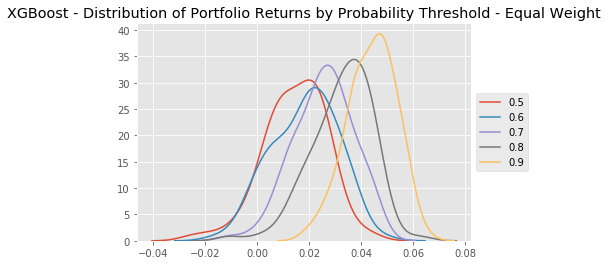

In [210]:
#Simulating 100 porfolios of 100 loans using different CAGR thresholds and 
#comparing performance (EQUAL WEIGHTED LOANS)

for i in boost_class_dfs:
    temp = boost_class_dfs[i]
    
    filt = simulate(temp,100)
    
    sns.distplot(filt, bins = 50, hist=False, label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('XGBoost - Distribution of Portfolio Returns by Probability Threshold - Equal Weight')

#### Performance of Our Pool of Loans vs Randomly Selected Pool of Loans

Text(0.5, 1.0, 'XGBoost Classifier Portfolio Returns - Our Pool vs Random - Equal Weight')

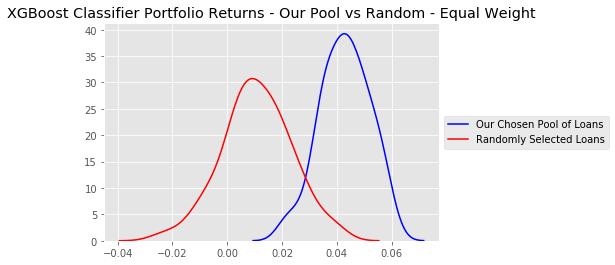

In [224]:
top_boost_class_df = boost_class_dfs[.9]
boostclass_filter_results = simulate(top_boost_class_df, 100)
boostclass_unfilter_results = simulate(d, 100)

sns.distplot(boostclass_filter_results, bins = 50, hist=False, color='blue', label = 'Our Chosen Pool of Loans')
sns.distplot(boostclass_unfilter_results, bins = 50, hist=False, color='red', label = 'Randomly Selected Loans')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('XGBoost Classifier Portfolio Returns - Our Pool vs Random - Equal Weight')

## Weighted Avg Loans

#### Finding the optimal CAGR Threshold

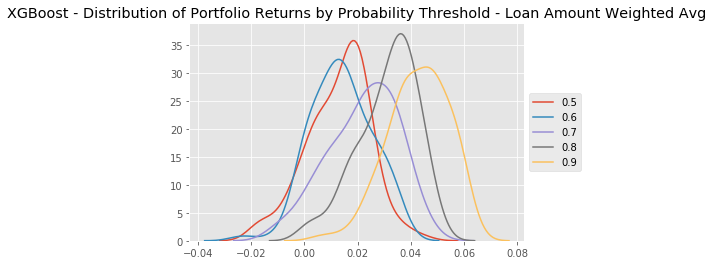

In [214]:
for i in boost_class_dfs:
    temp = boost_class_dfs[i]
    
    filt = simulate_weighted(temp,100)
    
    sns.distplot(filt, bins = 50, hist=False, label = i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('XGBoost - Distribution of Portfolio Returns by Probability Threshold - Loan Amount Weighted Avg')

#### Performance of Our Pool of Loans vs Randomly Selected Pool of Loans

Text(0.5, 1.0, 'XGBoost Classifier Portfolio Returns - Our Pool vs Random - Loan Amount Weighted Avg')

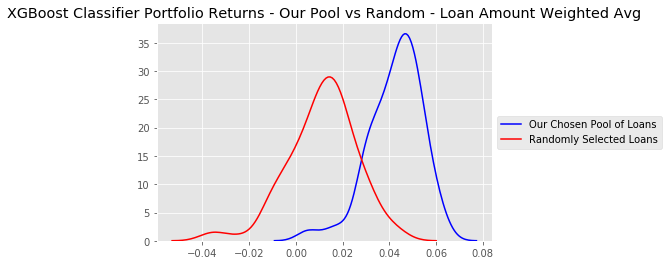

In [221]:
top_boost_class_df = boost_class_dfs[.9]
boostclass_filter_results_weighted = simulate_weighted(top_boost_class_df, 100)
boostclass_unfilter_results_weighted = simulate_weighted(d, 100)

sns.distplot(boostclass_filter_results_weighted, bins = 50, hist=False, color='blue', label = 'Our Chosen Pool of Loans')
sns.distplot(boostclass_unfilter_results_weighted, bins = 50, hist=False, color='red', label = 'Randomly Selected Loans')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('XGBoost Classifier Portfolio Returns - Our Pool vs Random - Loan Amount Weighted Avg')

### Comparing RandomForest, XGBoost Regressor and XGBoost Classifier (Equal Weighted)

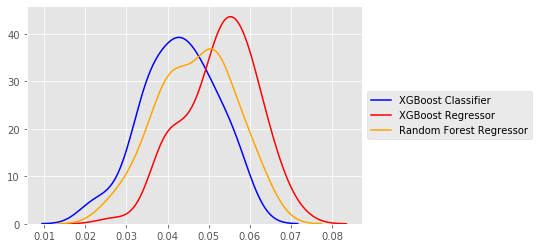

In [226]:
sns.distplot(boostclass_filter_results, bins = 50, hist=False, color='blue', label = 'XGBoost Classifier')
sns.distplot(boostreg_filter_results, bins = 50, hist=False, color='red', label = 'XGBoost Regressor')
sns.distplot(forestreg_filter_results, bins = 50, hist=False, color='orange', label = 'Random Forest Regressor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



### Comparing RandomForest, XGBoost Regressor and XGBoost Classifier (Loan Amount Weighted Avg)

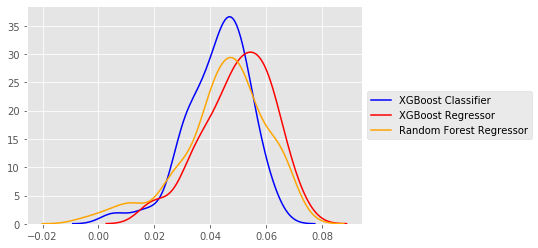

In [227]:
sns.distplot(boostclass_filter_results_weighted, bins = 50, hist=False, color='blue', label = 'XGBoost Classifier')
sns.distplot(boostreg_filter_results_weighted, bins = 50, hist=False, color='red', label = 'XGBoost Regressor')
sns.distplot(forestreg_filter_results_weighted, bins = 50, hist=False, color='orange', label = 'Random Forest Regressor')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [228]:
top_boost_class_df

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prob_paid_back,loan_status,cagr
1117949,35000.0,0,16.49,1238.98,2,45639,1,4,185000.0,1,4,13.76,0.0,729.0,0.0,8.0,0.0,32043.0,110.3,11.0,0.0,0.0,0.0,0,7.1,0.915642,1,0.012114
1119243,1125.0,0,17.14,40.19,3,59913,3,4,23000.0,9,2,26.98,0.0,719.0,1.0,7.0,0.0,5561.0,78.3,12.0,0.0,0.0,0.0,0,9.3,0.913772,1,0.009320
1120105,1300.0,0,15.99,45.70,1,54469,2,0,16000.0,6,4,13.95,0.0,674.0,4.0,20.0,1.0,3666.0,15.8,46.0,0.0,0.0,0.0,0,16.4,0.910113,1,0.002807
1120231,25000.0,1,6.00,533.96,4,37473,10,4,65000.0,2,32,31.46,0.0,719.0,0.0,13.0,0.0,15484.0,80.6,32.0,0.0,0.0,0.0,0,13.4,0.952273,1,0.074406
1122575,35000.0,1,18.54,899.09,5,17320,10,0,400000.0,2,4,15.18,0.0,724.0,1.0,14.0,0.0,193014.0,35.9,32.0,0.0,0.0,0.0,0,15.8,0.950988,1,0.023247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934230,2500.0,0,17.99,90.37,1,9610,7,4,15600.0,0,9,4.62,0.0,664.0,1.0,5.0,0.0,2898.0,25.4,8.0,0.0,0.0,0.0,0,4.7,0.905861,1,0.005007
1934556,18000.0,0,18.25,653.01,2,47313,4,4,104000.0,2,31,6.00,0.0,669.0,1.0,7.0,0.0,21323.0,89.2,19.0,0.0,0.0,0.0,0,8.3,0.910008,1,0.091877
1935801,1000.0,0,17.27,35.79,2,49850,4,4,25000.0,2,10,23.18,0.0,674.0,1.0,4.0,0.0,6653.0,88.7,13.0,0.0,0.0,0.0,0,4.0,0.912938,1,0.054294
1936847,30000.0,0,16.77,1066.16,1,2489,9,0,95000.0,2,35,11.91,0.0,704.0,0.0,6.0,0.0,28608.0,75.3,12.0,0.0,0.0,0.0,0,10.4,0.901663,1,0.082741


In [229]:
top_boost_reg_df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prediction,cagr
1816739,1500.0,0,17.56,53.90,0,10,0,53000.0,9,38,10.17,0.0,719.0,0.0,11.0,0.0,11073.0,57.1,14.0,0.0,0.0,0.0,0,18.2,0.025772,0.022819
1230319,4000.0,0,15.61,139.86,0,3,0,37440.0,4,5,16.96,0.0,669.0,1.0,4.0,0.0,7044.0,65.8,15.0,0.0,0.0,1.0,0,14.8,0.025166,0.053570
1279155,3500.0,0,18.24,126.96,4,2,4,135000.0,8,36,9.23,0.0,689.0,1.0,10.0,0.0,10445.0,47.9,18.0,0.0,0.0,0.0,0,16.5,0.025334,0.058074
1652385,1600.0,0,18.61,58.34,19,3,0,124200.0,9,5,28.29,0.0,644.0,0.0,15.0,0.0,73943.0,98.1,38.0,0.0,0.0,0.0,0,17.5,0.025660,0.092600
1895742,3000.0,0,17.77,108.12,0,1,4,73100.0,2,46,16.92,0.0,664.0,1.0,9.0,0.0,12686.0,94.0,25.0,0.0,0.0,0.0,0,10.3,0.025022,0.090638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822162,4200.0,0,17.56,150.92,0,7,0,175000.0,9,43,21.00,2.0,694.0,0.0,10.0,0.0,12192.0,95.2,44.0,0.0,0.0,0.0,0,25.0,0.029021,0.076552
1826081,2000.0,0,18.25,72.56,1,10,0,118000.0,12,47,27.52,0.0,674.0,0.0,12.0,0.0,13278.0,56.3,28.0,0.0,0.0,0.0,0,14.1,0.026080,0.071748
1805223,3000.0,0,24.50,118.49,12,3,4,68000.0,9,4,12.26,0.0,689.0,1.0,4.0,0.0,2881.0,96.0,5.0,0.0,0.0,0.0,0,14.8,0.025157,0.124476
1309294,4600.0,0,19.99,170.93,5,10,0,135000.0,9,40,34.55,3.0,669.0,0.0,8.0,0.0,27309.0,98.9,25.0,0.0,0.0,0.0,0,32.2,0.027110,0.101843


In [230]:
top_forest_df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,test_prediction,cagr
1794613,5000.0,0,17.76,180.17,0,10,4,63180.0,2,29,7.86,3.0,674.0,1.0,9.0,0.0,4368.0,68.2,27.0,0.0,0.0,0.0,0,19.1,0.051602,0.083062
1251081,4675.0,0,20.99,176.11,8,10,4,88300.0,4,20,12.44,3.0,669.0,0.0,7.0,0.0,2640.0,80.0,29.0,0.0,0.0,0.0,0,16.6,0.052747,0.107021
1870096,35000.0,1,22.95,985.67,10,10,0,91945.0,2,26,15.92,0.0,684.0,1.0,10.0,0.0,25083.0,74.4,35.0,0.0,0.0,0.0,0,26.8,0.046955,0.109677
1349744,12700.0,0,18.25,460.73,2,8,0,125000.0,2,32,11.40,1.0,684.0,3.0,11.0,0.0,10141.0,50.7,26.0,0.0,0.0,0.0,0,18.1,0.050926,-0.078271
1230387,4000.0,0,23.43,155.74,10,10,0,100000.0,9,21,9.26,0.0,674.0,1.0,7.0,0.0,6018.0,68.4,13.0,0.0,0.0,0.0,0,29.1,0.066289,0.118881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761494,2500.0,0,23.70,97.69,10,9,3,34000.0,9,9,20.97,0.0,684.0,0.0,10.0,0.0,19559.0,69.4,21.0,0.0,0.0,0.0,0,12.2,0.045640,-0.461329
1204917,1200.0,0,23.43,46.73,10,10,0,54000.0,12,33,19.60,0.0,684.0,2.0,9.0,0.0,12977.0,86.5,16.0,0.0,0.0,0.0,0,11.8,0.053403,-0.336105
1861220,2500.0,0,19.05,91.71,3,8,4,70000.0,7,41,28.92,0.0,704.0,0.0,10.0,0.0,8013.0,83.5,27.0,0.0,0.0,0.0,0,19.8,0.047060,0.033574
1855743,4800.0,0,18.49,174.72,1,5,0,46821.0,9,33,22.12,0.0,694.0,0.0,7.0,0.0,5333.0,82.0,19.0,0.0,0.0,0.0,0,18.5,0.048507,0.094278


In [232]:
top_forest_df.to_csv('pool_forest_df.csv')

In [233]:
top_boost_reg_df.to_csv('pool_boost_reg_df.csv')

In [234]:
top_boost_class_df.to_csv('pool_boost_class_df.csv')